In [3]:
# Header stuff that Jared usually includes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('mesa') # Style file to make plots look better

from random import random

OSError: 'mesa' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

integral is 1.4602
error is 0.00887815273578913


/var/folders/z5/kymyxx1x1pz6yjtgttlf_zdw0000gq/T/ipykernel_55171/254444816.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
/var/folders/z5/kymyxx1x1pz6yjtgttlf_zdw0000gq/T/ipykernel_55171/254444816.py:2: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2


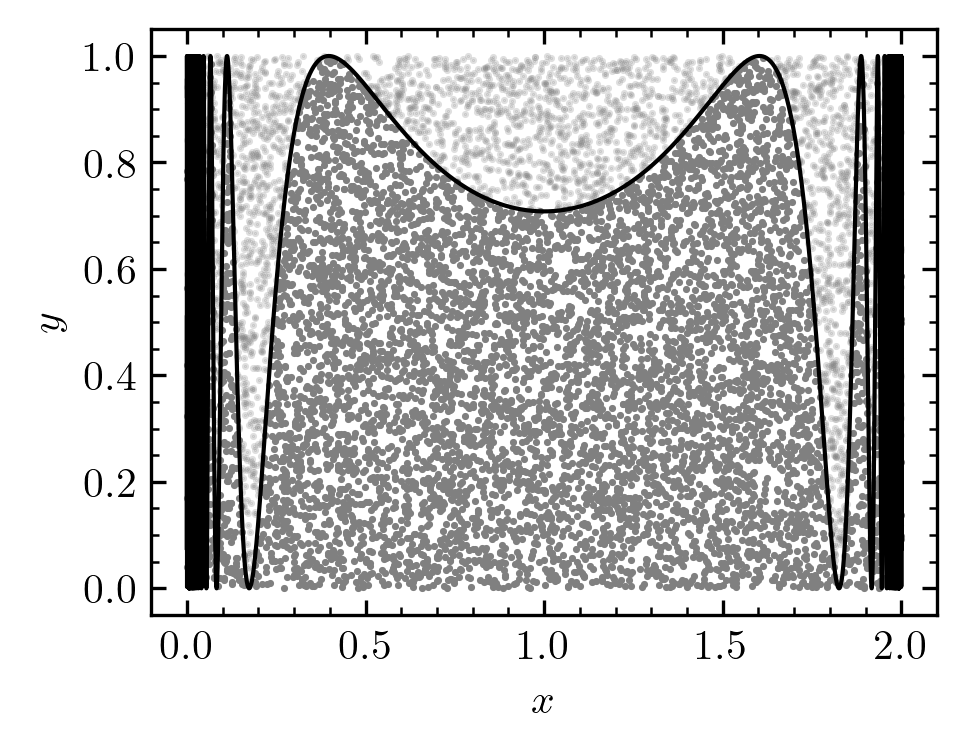

In [3]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

# USING random 
N = 10000
count = 0
xlist = []
ylist = []
xunder = []
yunder = []
for i in range(N):
    x = 2*random() # This gives random point drawn from distribution from zero to 2 in x
    xlist.append(x)
    y = random()
    ylist.append(y)    
    
    if y<f(x):
        count += 1
        xunder.append(x)
        yunder.append(y)
        
I = 2*count/N
print('integral is', I)

A = 2
print('error is', np.sqrt(I*(A-I)/N))



fig, ax = plt.subplots()
xrange = np.linspace(0,2,100000)
ax.plot(xrange, f(xrange), linewidth=1, color='black')
ax.scatter(xlist, ylist, marker='.',s=2, color='grey', alpha=0.25)
ax.scatter(xunder, yunder, marker='.',s=2, color='grey')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()


In [4]:
# MORE NUMPY-HEAVY IMPLEMENTATION OF HIT OR MISS: Do this using a masked array 

def f(x):
    return (np.sin(1/(x*(2-x))))**2

# USING random 
N = 10000

# Using an array and a mask # Generate N random x and N random y 

xlist = 2*np.random.random(N) # This gives random point drawn from distribution from zero to 2 in x
ylist = np.random.random(N) # This gives random point drawn from distribution from zero to 2 in x

# Where is f(x) > y
mask = [f(xlist)/ylist>1]
print('Is f(x) > y? mask:', mask)

# Calculate the integral as (b-a)*fraction of N where f(x)>y
I = 2*np.sum(mask)/N
print('integral is', I)

# Estimate the error
A = 2
print('error is', np.sqrt(I*(A-I)/N))

Is f(x) > y? mask: [array([False,  True,  True, ...,  True,  True,  True])]
integral is 1.4616
error is 0.008870881805096943


integral is 1.4466364386478565
error is 0.005304121996119778


/var/folders/z5/kymyxx1x1pz6yjtgttlf_zdw0000gq/T/ipykernel_55171/2692521921.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return (np.sin(1/(x*(2-x))))**2
/var/folders/z5/kymyxx1x1pz6yjtgttlf_zdw0000gq/T/ipykernel_55171/2692521921.py:4: RuntimeWarning: invalid value encountered in sin
  return (np.sin(1/(x*(2-x))))**2


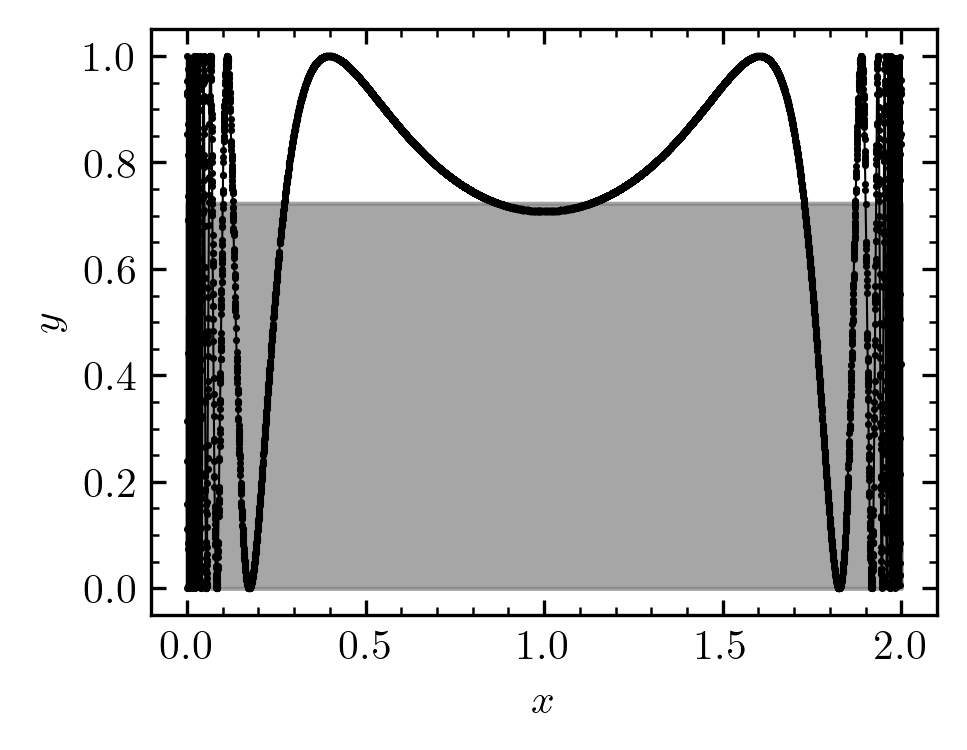

In [5]:
# NOW LET'S TRY THIS WITH MEAN VALUE INTEGRATION 

N = 10000
count = 0
summ=0
summsquared=0

xrandlist = []
for i in range(N):
    x = 2*random() # This gives random point drawn from distribution from zero to 2 in x
    xrandlist.append(x)
    summ += f(x)
    summsquared += (f(x))**2
    
avgf = summ/N
avgf2 = summsquared/N


I = 2*avgf

print('integral is', I)
print('error is', 2*np.sqrt(np.abs(avgf2 - avgf**2)/N))

fig, ax = plt.subplots()
xrange = np.linspace(0,2,100000)
ax.plot(xrange, f(xrange), linewidth=0.5, color='black')
ax.fill_between(xrange, [I/2 for x in xrange], color='grey', alpha=0.7)

ax.scatter(xrandlist, f(np.asarray(xrandlist)), color='black',s=2, marker='.')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

In [6]:
# ALTERNATE NUMPY-HEAVY IMPLEMENTATION OF MEAN VALUE INTEGRATION

N = 10000

xlist = 2*np.random.random(N) # This gives random point drawn from distribution from zero to 2 in x
fxlist = f(xlist) # This variable definition isn't necessary, but makes life easier calculating the error

# Calculate the average value of f
summ = np.sum(fxlist)
avgf = summ/N

# Avg f * interval = integral 
I = (2.0-0)*avgf # (b-a)*average f 
print('integral is', I)

# Calculate error. First we need also the sum of f^2
summsquared = np.sum(fxlist*fxlist)
avgf2 = summsquared/N
# Error = 2*sqrt( |<f^2> - <f>^2)| /N )
print('error is', 2*np.sqrt(np.abs(avgf2 - avgf**2)/N))

integral is 1.4425310446567976
error is 0.005430243212080707


In [1]:
# MINIMAL(?) LINES OF CODE VERSION OF MEAN VALUE INTEGRATION
import numpy as np; f = lambda x: (np.sin(1/(x*(2-x))))**2; print('integral is', 2*np.sum(f(2*np.random.random(10000)))/10000)

integral is 1.4563494973525897


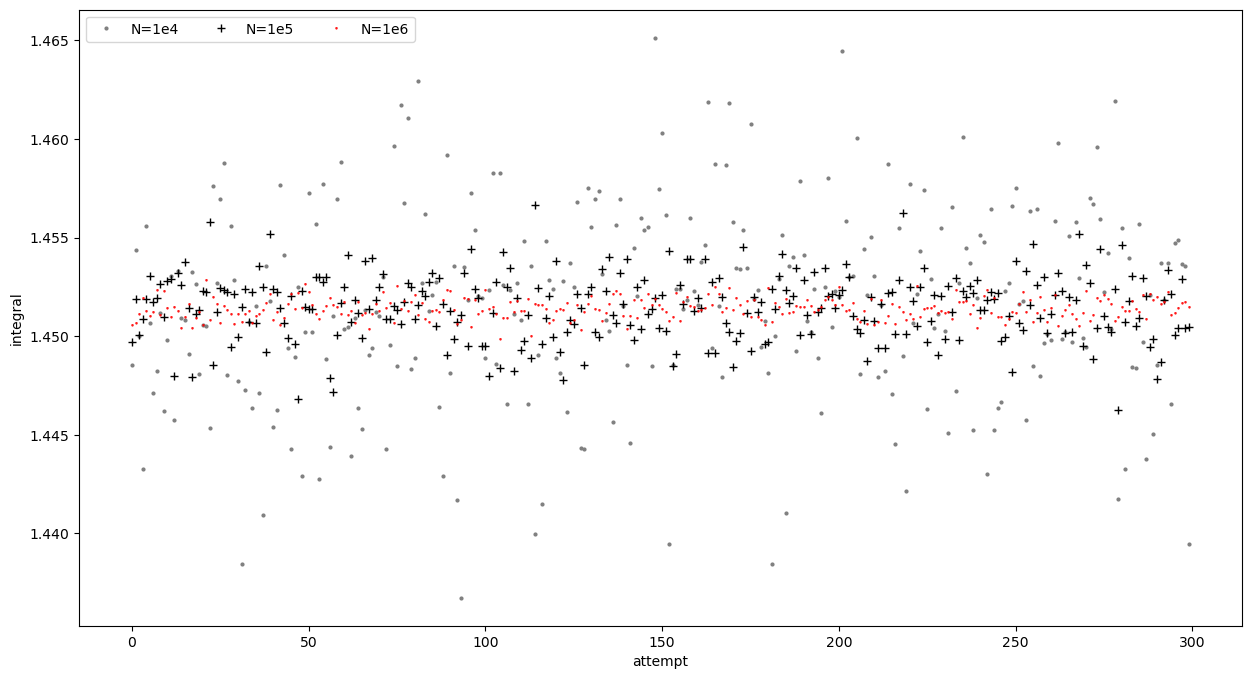

In [7]:
# WHAT DOES THIS TYPICALLY RECOVER? Let's try this a bunch of times and see 

import numpy as np
f = lambda x: (np.sin(1/(x*(2-x))))**2

Nruns = 300
Nevals = 10000
Nevals2 = 100000
Nevals3 = 1000000

Ilist = np.zeros(Nruns)
Ilist2 = np.zeros(Nruns)
Ilist3 = np.zeros(Nruns)
for n in range(Nruns): 
    Ilist[n] = 2*np.sum(f(2*np.random.random(Nevals)))/Nevals
    Ilist2[n] = 2*np.sum(f(2*np.random.random(Nevals2)))/Nevals2
    Ilist3[n] = 2*np.sum(f(2*np.random.random(Nevals3)))/Nevals3    
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(Nruns), Ilist, marker='o', linestyle='None', color='grey', label='N=1e4', markersize=2)
ax.plot(range(Nruns), Ilist2, marker='+', linestyle='None', color='k', label='N=1e5')
ax.plot(range(Nruns), Ilist3, marker='v', linestyle='None', color='red', label='N=1e6', markersize=1)
ax.set_ylabel('integral')
ax.set_xlabel('attempt')
ax.legend(ncol=3, loc='upper left')
plt.show()